### Analisis exploratorio de datos de comunidades definidas por algoritmo de Louvain

En este notebook, se hara un analisis exhaustivo de la composicion de comunidades para la data de entidades tributarias contaminadas. 

In [1]:
import pandas as pd
import seaborn as sns
from IPython.display import Markdown, display
import matplotlib.pyplot as plt

In [2]:
# Leemos la data de los valores contaminados y sus correspondientes labels
contaminados=pd.read_csv('/home/cdsw/data/processed/comunidades_louvain/comunidades_resolution_study_louvain.csv', delimiter=',', index_col=0, header=0)

In [3]:
contaminados

,cont_rut,score,total_pago_f29,IVA_neto,unidad_regional,n_documentos,lifetime,alerta_inicial,comunidad_0.0,modularidad_0.0,...,comunidad_0.6,modularidad_0.6,comunidad_0.7,modularidad_0.7,comunidad_0.8,modularidad_0.8,comunidad_0.9,modularidad_0.9,comunidad_1.0,modularidad_1.0
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,++2mOmlMTMf8FP8ASHp+UQ==,0.024528,NaN,2045987,NaN,NaN,NaN,0,1269,0.754594,...,2,0.836832,2,0.841359,2,0.842336,2,0.843339,2,0.843236
1,++KCc/MVDP3ZynZeMovWKw==,0.023812,NaN,27477,SANTIAGO ORIENTE,NaN,NaN,0,9,0.754594,...,13,0.836832,14,0.841359,14,0.842336,19,0.843339,17,0.843236
2,+/+IMFryGSJkidvlco+B4w==,0.045975,927465.0,76230,SANTIAGO ORIENTE,34.0,1940.0,0,16405,0.754594,...,53,0.836832,4,0.841359,4,0.842336,9,0.843339,9,0.843236
3,+/GP2pgvQ+KWPs5dTP+nxg==,0.023277,0.0,858890,8VA UNIDAD REGIONAL BIO BIO,NaN,NaN,0,107,0.754594,...,14,0.836832,15,0.841359,16,0.842336,17,0.843339,101,0.843236
4,+/vREtWUlsd1b34Xnt+fkA==,0.075983,NaN,19285,SANTIAGO PONIENTE,NaN,NaN,0,4016,0.754594,...,1,0.836832,1,0.841359,1,0.842336,1,0.843339,1,0.843236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336699,zzMViLxxS6IFYGZoWKcJ3A==,0.023761,NaN,106163,8VA UNIDAD REGIONAL BIO BIO,NaN,NaN,0,56569,0.754594,...,1,0.836832,1,0.841359,1,0.842336,21,0.843339,4,0.843236
4336700,zzU0t3f7Q3RWZ+5nQb9VCA==,0.037638,20145354.0,-25167390,8VA UNIDAD REGIONAL BIO BIO,638.0,NaN,0,45947,0.754594,...,1,0.836832,4,0.841359,4,0.842336,9,0.843339,9,0.843236
4336701,zzn49i8laV7Hj40aQgF6kQ==,0.013022,3027054.0,-94661371,SANTIAGO PONIENTE,5184.0,1525.0,0,166756,0.754594,...,1,0.836832,1,0.841359,1,0.842336,1,0.843339,1,0.843236


Se seleccionan los labels principales y las comunidades calculadas con resolucion 0.8

In [4]:
columnas_a_eliminar = [col for col in contaminados.columns if col.startswith('comunidad') or col.startswith('modularidad')]
columnas_a_mantener = ['comunidad_0.8']
columnas_a_eliminar = [col for col in columnas_a_eliminar if col not in columnas_a_mantener]

contaminados = contaminados.drop(columns=columnas_a_eliminar)


In [5]:
valor_dinamico = contaminados.shape[0]
markdown_text = f"La cantidad de entidades contaminadas es: {valor_dinamico}"
display(Markdown(markdown_text))

La cantidad de entidades contaminadas es: 4336704

### Valores nulos 

Lo primero que haremos es ver que porcentaje de valores nulos tenemos presente en la data de contaminados. 

In [6]:
nulos_por_columna = contaminados.isnull().sum()
nulos_por_columna

cont_rut                 0
score                    0
total_pago_f29     2713302
IVA_neto                 0
unidad_regional     644782
n_documentos       3463238
lifetime           3373727
alerta_inicial           0
comunidad_0.8            0
dtype: int64

In [7]:
porcentaje_nulos_por_columna = nulos_por_columna / len(contaminados)*100
porcentaje_nulos_por_columna = porcentaje_nulos_por_columna.sort_values(ascending=False)
# Convertir la serie en un DataFrame y renombrar las columnas
df_porcentaje_nulos = pd.DataFrame(porcentaje_nulos_por_columna)
df_porcentaje_nulos = df_porcentaje_nulos.reset_index()
df_porcentaje_nulos.columns = ['columna', 'porcentaje de valores nulos']
df_porcentaje_nulos

,columna,porcentaje de valores nulos
0,n_documentos,79.858759
1,lifetime,77.794726
2,total_pago_f29,62.565995
3,unidad_regional,14.868020
4,cont_rut,0.000000
5,IVA_neto,0.000000
6,score,0.000000
7,alerta_inicial,0.000000
8,comunidad_0.8,0.000000


En este caso vemos que las columnas descriptoras con mayor porcentaje de valores nuelos es n_documentos, lifetime y total_pago_f29.

### Distribucion de variables mas importantes

Ahora veamos la distribucion de cada una de las variables descriptoras mas importantes.

In [8]:
# se crea una funcion para poder graficar la distribucion de cada variable
def plot_multiple_kdeplots(dataframe, columns):
    # Calcular el número de filas y columnas para la cuadrícula de subgráficos
    num_filas = len(columns) // 2 + len(columns) % 2  # Redondea hacia arriba si el número de columnas no es divisible por 2
    num_columnas = 2

    # Crear la cuadrícula de subgráficos
    fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 10))

    # Iterar sobre las columnas y crear un gráfico KDEplot para cada una
    for i, columna in enumerate(columns):
        fila = i // num_columnas
        columna_ = i % num_columnas
        sns.kdeplot(dataframe[columna], ax=axs[fila, columna_])
        axs[fila, columna_].set_title(columna)  # Establecer el título del gráfico como el nombre de la columna

    # Ajustar el diseño de los subgráficos
    plt.tight_layout()

    # Mostrar los gráficos
    plt.show()



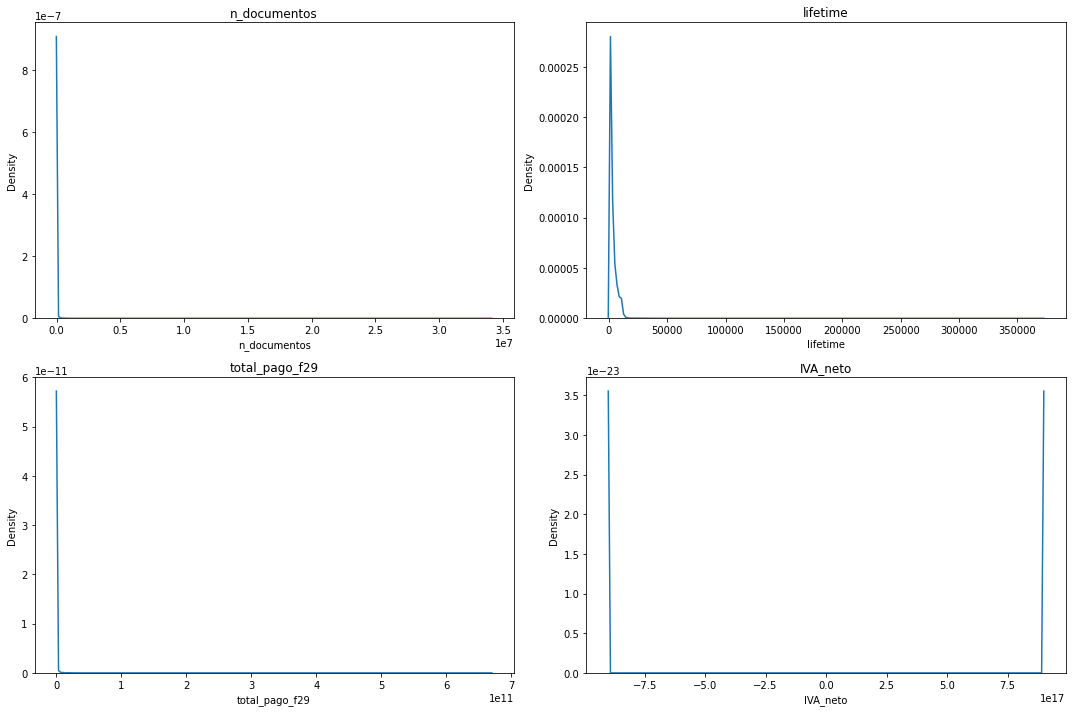

In [9]:
columnas = ['n_documentos', 'lifetime', 'total_pago_f29', 'IVA_neto']
plot_multiple_kdeplots(contaminados, columnas)

Por otro lado, veamos como se comporta la columna unidad_regional la cual es categorica.

In [10]:
def plot_count_by_category(dataframe, column):
    # Obtener el recuento de cada categoría y ordenarlas de mayor a menor
    categorias_ordenadas = dataframe[column].value_counts().index
    
    # Crear el gráfico de recuento por categoría con el color azul cielo y las categorías ordenadas
    sns.countplot(x=column, data=dataframe, color='skyblue', order=categorias_ordenadas)
    
    # Rotar las etiquetas del eje x para mejorar la legibilidad si es necesario
    plt.xticks(rotation=45, ha='right')
    
    # Añadir título al gráfico
    plt.title(f'Conteo de entradas por categoría en la columna {column}')
    
    # Mostrar el gráfico
    plt.show()


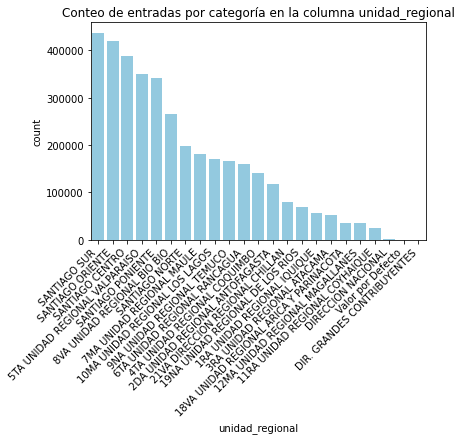

In [11]:
plot_count_by_category(contaminados, 'unidad_regional')

Veamos ahora los valores mas altos para las variables de interes. 

In [12]:

def highest_values(dataframe, columns):
    # Inicializar un diccionario para almacenar los 10 valores más altos de cada columna
    valores_mas_altos = {}

    # Iterar sobre cada columna del DataFrame
    for columna in columns:
        # Obtener los 10 valores más altos de la columna y sus índices
        max_valores = dataframe.nlargest(10, columna)
        
        # Guardar los valores más altos en el diccionario
        valores_mas_altos[columna] = max_valores[columna].tolist()

    # Crear un DataFrame a partir del diccionario
    df_valores_mas_altos = pd.DataFrame(valores_mas_altos)

    return df_valores_mas_altos


In [13]:
highest_values(contaminados, columnas)

,n_documentos,lifetime,total_pago_f29,IVA_neto
0,34111723.0,371945.0,6.703137e+11,900000000933232749
1,17872257.0,370086.0,4.143090e+11,11876744603908705
2,15820853.0,370081.0,3.077249e+11,589708442850306
3,13640414.0,370079.0,2.766246e+11,146130582660789
4,13548570.0,370074.0,2.265761e+11,26617844633206
5,12187061.0,357667.0,2.131157e+11,19667392312743
6,12108844.0,304416.0,1.916099e+11,11663070403915
7,11036333.0,304409.0,1.896125e+11,6651356497205
8,9497035.0,304369.0,1.875286e+11,4446455354901
9,9403791.0,304331.0,1.813122e+11,3035175275372


Grafiquemos ahora el grafico de densidad de cada columna pero con el percentil menor a 0.9

In [14]:
def plot_multiple_kdeplots_percentil(dataframe, columns):
    # Calcular el número de filas y columnas para la cuadrícula de subgráficos
    num_filas = (len(columns) + 1) // 2  # Redondea hacia arriba dividiendo entre 2
    num_columnas = min(len(columns), 2)

    # Crear la cuadrícula de subgráficos
    fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 5*num_filas))

    # Iterar sobre las columnas y crear un gráfico KDEplot para cada una
    for i, columna in enumerate(columns):
        fila = i // num_columnas
        columna_ = i % num_columnas
        
        # Filtrar los valores de la columna que están por debajo del percentil 90
        valores_filtrados = dataframe[dataframe[columna] <= dataframe[columna].quantile(0.90)]
        
        # Graficar el KDEplot para los valores filtrados
        sns.kdeplot(valores_filtrados[columna], ax=axs[fila, columna_])
        axs[fila, columna_].set_title(columna)  # Establecer el título del gráfico como el nombre de la columna

    # Ajustar el diseño de los subgráficos
    plt.tight_layout()

    # Mostrar los gráficos
    plt.show()



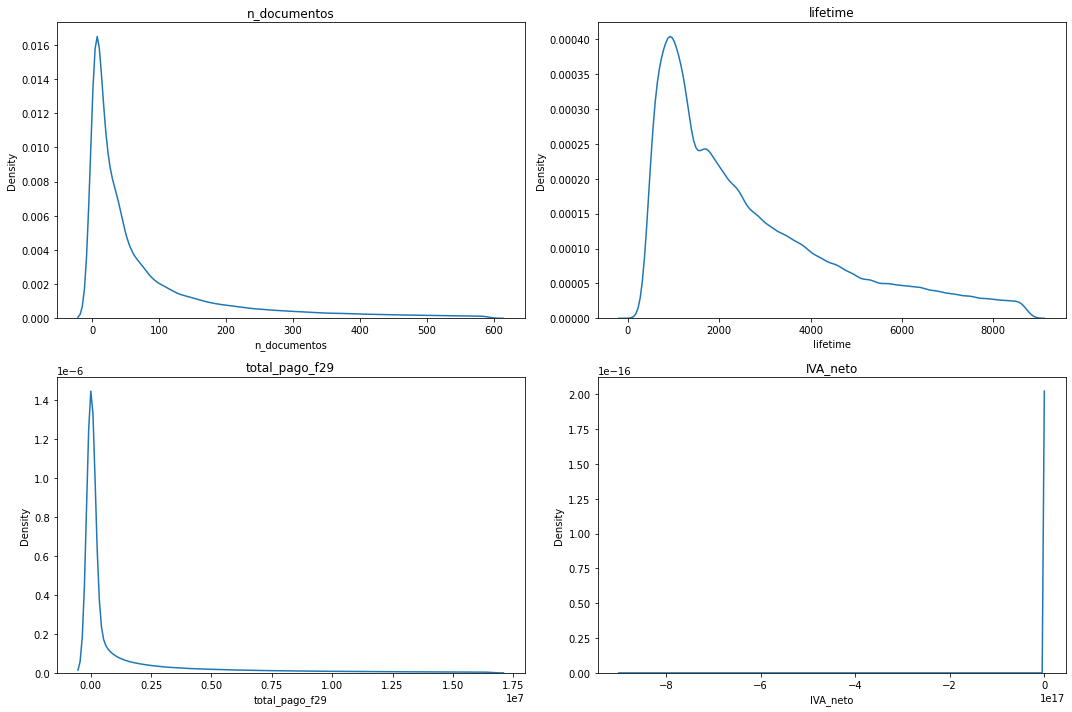

In [15]:
plot_multiple_kdeplots_percentil(contaminados, columnas)

### Distribucion de tamano de grupos

Ahora analicemos el tamanio de las comunidades en distribucion: 

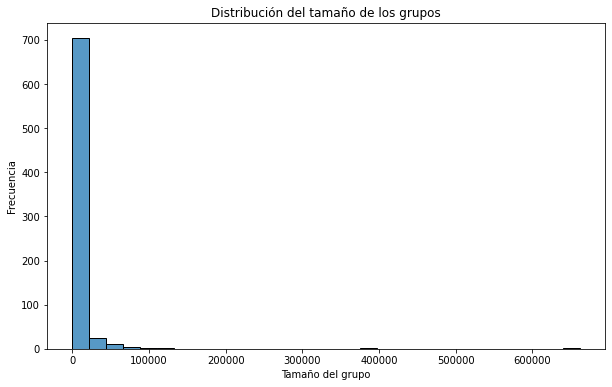

In [16]:
# Agrupar los datos por 'cont_rut' y contar el tamaño de cada grupo
tamanos_grupos = contaminados.groupby('comunidad_0.8').size()
# Crear el gráfico de distribución del tamaño de los grupos
plt.figure(figsize=(10, 6))
sns.histplot(tamanos_grupos, bins=30, kde=False)
plt.title('Distribución del tamaño de los grupos')
plt.xlabel('Tamaño del grupo')
plt.ylabel('Frecuencia')
plt.show()

La gran mayoria de los grupos tiene pocos miembros, veamos ahora los valores bajo el percentil 0.9

In [17]:
# Calcular el tamaño de los grupos y convertirlo en un DataFrame
tamanos_grupos = contaminados.groupby('comunidad_0.8').size().reset_index(name='count')
tamanos_grupos

,comunidad_0.8,count
0,1,661713
1,2,380323
2,3,132172
3,4,126874
4,5,91763
...,...,...
742,743,1
743,744,1
744,745,1
745,746,1


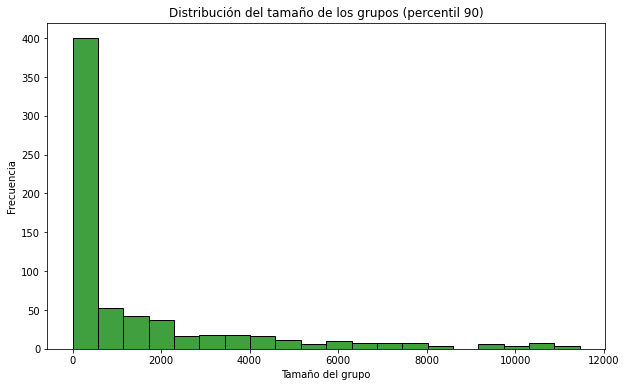

In [18]:
# Calcular el percentil 0.9 del tamaño de los grupos
percentil_90 = tamanos_grupos['count'].quantile(0.90)
# Filtrar los grupos cuyo tamaño está por debajo del percentil 0.9
tamanos_grupos_filtrados = tamanos_grupos[tamanos_grupos['count'] <= percentil_90]
# Crear el gráfico de distribución del tamaño de los grupos filtrados
plt.figure(figsize=(10, 6))
sns.histplot(tamanos_grupos_filtrados['count'], bins=20, color='green')
plt.title('Distribución del tamaño de los grupos (percentil 90)')
plt.xlabel('Tamaño del grupo')
plt.ylabel('Frecuencia')
plt.show()

Reafirmamos que la gran mayoria de los grupos tiene tamano bajo. Analicemos lo grupos con mas de 5 contribuyentes bajo el percentil 0.9

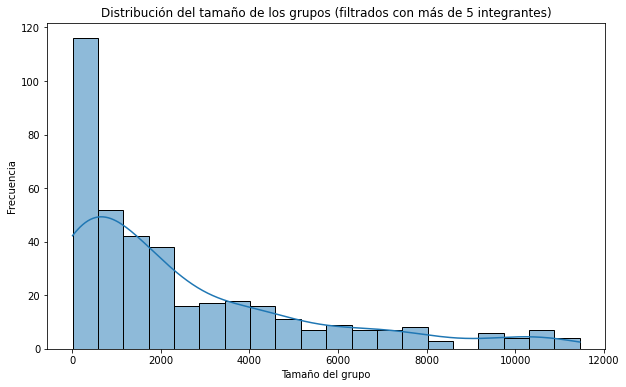

In [19]:
# Calcular el tamaño de los grupos y convertirlo en un DataFrame
tamanos_grupos = contaminados.groupby('comunidad_0.8').size().reset_index(name='count')

# Calcular el percentil 0.9 del tamaño de los grupos
percentil_90 = tamanos_grupos['count'].quantile(0.90)
# Filtrar los grupos cuyo tamaño está por debajo del percentil 0.9
tamanos_grupos_filtrados = tamanos_grupos[tamanos_grupos['count'] <= percentil_90]
# Filtrar los gruposa a partir de integrantes
tamanos_grupos_filtrados =tamanos_grupos_filtrados [tamanos_grupos_filtrados ['count'] >= 5]

# Crear el gráfico de distribución del tamaño de los grupos filtrados
plt.figure(figsize=(10, 6))
sns.histplot(tamanos_grupos_filtrados['count'], bins=20, kde=True)
plt.title('Distribución del tamaño de los grupos (filtrados con más de 5 integrantes)')
plt.xlabel('Tamaño del grupo')
plt.ylabel('Frecuencia')
plt.show()


### Estadisticas por grupo

Ahora definiremos las estadisticas por comunidad y de este modo, posteriormente podremos agregar data relacionadad con el IVA intra y extra grupo

In [20]:
def promedio_no_nulos(x):
    x_no_nulos = x.dropna()  # Excluir valores nulos
    if len(x_no_nulos) > 0:
        return x_no_nulos.mean()
    else:
        return None  # Si hay solo nulos, devolver None

def moda_frecuencia(x):
    moda = x.mode()
    if not moda.empty:
        return (x == moda[0]).sum()
    else:
        return 0

def estadisticas(dataframe_contaminados):
    # Agrupar los datos por 'comunidad_0.8' y calcular las estadísticas requeridas
    estadisticas_por_comunidad = dataframe_contaminados.groupby('comunidad_0.8').agg(
        promedio_score=('score', 'mean'),
        miembros=('score', 'size'),
        contaminados_iniciales=('alerta_inicial', 'sum'),
        promedio_total_pago_f29=('total_pago_f29', promedio_no_nulos),
        nulos_total_pago_f29=('total_pago_f29', lambda x: x.isnull().sum()),
        promedio_IVA_neto=('IVA_neto', promedio_no_nulos),
        nulos_IVA_neto=('IVA_neto', lambda x: x.isnull().sum()),
        promedio_n_documentos=('n_documentos', promedio_no_nulos),
        nulos_n_documentos=('n_documentos', lambda x: x.isnull().sum()),
        promedio_lifetime=('lifetime', promedio_no_nulos),
        nulos_lifetime=('lifetime', lambda x: x.isnull().sum()),
        moda_unidad_regional=('unidad_regional', lambda x: x.mode()[0] if not x.mode().empty else 'Sin Moda'),
        frecuencia_unidad_regional=('unidad_regional', moda_frecuencia)
    )
    
    # Ordenar el DataFrame por el score promedio de manera descendente
    estadisticas_por_comunidad = estadisticas_por_comunidad.sort_values(by='promedio_score', ascending=False)
   
    # Mostrar el DataFrame con las estadísticas por comunidad
    return estadisticas_por_comunidad


In [21]:
#contaminados=contaminados[contaminados['comunidad_0.8']==450]

In [22]:
estadistica=estadisticas(contaminados)
estadistica=estadistica.sort_values(by='miembros', ascending=False)

In [23]:
display(contaminados)
estadistica

,cont_rut,score,total_pago_f29,IVA_neto,unidad_regional,n_documentos,lifetime,alerta_inicial,comunidad_0.8
Unnamed: 0,,,,,,,,,
0,++2mOmlMTMf8FP8ASHp+UQ==,0.024528,NaN,2045987,NaN,NaN,NaN,0,2
1,++KCc/MVDP3ZynZeMovWKw==,0.023812,NaN,27477,SANTIAGO ORIENTE,NaN,NaN,0,14
2,+/+IMFryGSJkidvlco+B4w==,0.045975,927465.0,76230,SANTIAGO ORIENTE,34.0,1940.0,0,4
3,+/GP2pgvQ+KWPs5dTP+nxg==,0.023277,0.0,858890,8VA UNIDAD REGIONAL BIO BIO,NaN,NaN,0,16
4,+/vREtWUlsd1b34Xnt+fkA==,0.075983,NaN,19285,SANTIAGO PONIENTE,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...
4336699,zzMViLxxS6IFYGZoWKcJ3A==,0.023761,NaN,106163,8VA UNIDAD REGIONAL BIO BIO,NaN,NaN,0,1
4336700,zzU0t3f7Q3RWZ+5nQb9VCA==,0.037638,20145354.0,-25167390,8VA UNIDAD REGIONAL BIO BIO,638.0,NaN,0,4
4336701,zzn49i8laV7Hj40aQgF6kQ==,0.013022,3027054.0,-94661371,SANTIAGO PONIENTE,5184.0,1525.0,0,1


,promedio_score,miembros,contaminados_iniciales,promedio_total_pago_f29,nulos_total_pago_f29,promedio_IVA_neto,nulos_IVA_neto,promedio_n_documentos,nulos_n_documentos,promedio_lifetime,nulos_lifetime,moda_unidad_regional,frecuencia_unidad_regional
comunidad_0.8,,,,,,,,,,,,,
1,0.058984,661713,7997,5.789405e+07,178177,-1.360388e+12,0,1084.521874,272713,3127.580029,299931,SANTIAGO ORIENTE,69594
2,0.035540,380323,461,2.106215e+07,104184,2.366429e+12,0,3614.103377,277389,2558.781110,276408,SANTIAGO SUR,43156
3,0.035496,132172,195,3.407513e+07,77935,-9.026455e+06,0,428.621243,91980,4176.734425,111402,7MA UNIDAD REGIONAL MAULE,23434
4,0.052324,126874,215,1.680915e+07,58530,-2.286609e+06,0,731.802948,95329,2716.913070,85841,SANTIAGO CENTRO,12410
5,0.042549,91763,84,3.474080e+06,74416,3.005061e+06,0,1214.267126,87121,3333.556774,87386,SANTIAGO SUR,14736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0.000000,1,0,3.301530e+06,0,1.329582e+06,0,103.000000,0,1736.000000,0,SANTIAGO SUR,1
743,0.000000,1,0,NaN,1,1.136200e+06,0,1.000000,0,2694.000000,0,SANTIAGO CENTRO,1
740,0.001553,1,0,1.301810e+05,0,-7.617590e+05,0,5.000000,0,NaN,1,18VA UNIDAD REGIONAL ARICA Y PARINACOTA,1


Un comentario importante es que la funcion descrita para calcular el promedio omite automaticamente los valores Nan en el calculo de promedio.

In [24]:
estadistica.to_csv('/home/cdsw/data/processed/comunidades_louvain/estadistica_comunidades_louvain.csv')